In [93]:
import requests

In [96]:
resp = requests.get('https://ya.ru/fgdhjfgjsdfgsjk')
resp

<Response [404]>

In [ ]:
resp

In [97]:
resp = requests.get('https://api.hh.ru/vacancies/99')

In [98]:
resp.json()

{'id': '99',
 'premium': False,
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'relations': [],
 'name': 'Embedded OS engineering manager',
 'insider_interview': None,
 'response_letter_required': True,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': None, 'to': 2000, 'currency': 'USD', 'gross': None},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'allow_messages': True,
 'site': {'id': 'hh', 'name': 'hh.ru'},
 'experience': {'id': 'between1And3', 'name': 'От 1 года до 3 лет'},
 'schedule': {'id': 'fullDay', 'name': 'Полный день'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': 'Embedded OS engineering manager  \r<br />\nVacancy opening at Samsung Electronics Research Center in Moscow. \r<br />\n\r<br />\nP o s i t i o n : Project Leader on full time basis \r<br />\n\r<br />\nQ u a l i f i c a t i o n : 4-5 year experience of work in embedded 

In [ ]:
resp = requests.get('https://kommersant.ru')
resp

# Парсинг
Достанем из архива газеты «Коммерсант» новости спорта и культуры

# Этапы

Задача разбивается на 2 части:
<ol>
    <li>Вытащим из архива URL конкретных новостей</li>
    <li>Пройдёмся по страницам конкретных новостей и соберем их заголовки, даты и тексты</li>
</ol>

In [99]:
#культура
url1 = 'https://kommersant.ru/archive/rubric/8/month'
#спорт
url2 = 'https://kommersant.ru/archive/rubric/9/month'

In [100]:
# новостей с начала года нам достаточно
url_suffix = ['', '//2020-09-01', '//2020-08-01','//2020-07-01']
#url_suffix = ['']

In [101]:
#tqdm
parse_cult = []

for suff in url_suffix:
    parse_cult.append(
        requests.get(url1 + suff)
    )

In [102]:
#tqdm
parse_sport = []

for suff in url_suffix:
    parse_sport.append(
        requests.get(url2 + suff)
    )

In [ ]:
import bs4

def get_links(text):

    soup = bs4.BeautifulSoup(text,'lxml')       
    link_divs = soup.findAll('div',{'class': 'archive_result__item_text'})
    return [[link.find('a')['href'], link.find('h3',{'class': 'article_name'}).text] for link in link_divs] if not None else []

In [103]:
links_cult  = sum([get_links(elem.text) for elem in parse_cult], [])
links_sport = sum([get_links(elem.text) for elem in parse_sport], [])

In [104]:
len(links_sport), len(links_cult), links_cult[0]

(895, 569, ['/doc/4529284', 'Мэтр из городского совета'])

In [106]:
main_url = 'https://kommersant.ru'
main_url + links_cult[0][0]

'https://kommersant.ru/doc/4529284'

## Разбор текста конкретной новости

In [107]:
from tqdm import tqdm_notebook as tqdm

In [108]:
a = requests.get(main_url + links_cult[0][0]).text

In [ ]:
main_url + links_cult[0][0]

In [109]:
soup = bs4.BeautifulSoup(a,'lxml')
soup.find('meta',{'name': 'description'})['content'], soup.find('meta',{'property': 'article:published_time'})['content']

('В Лувре до 4 января открыта первая послекарантинная выставка — «Альбрехт Альтдорфер, мэтр германского Ренессанса». На ней герой выставки предстает рядом со своим великим баварским земляком Альбрехтом Дюрером — и не проигрывает в соревновании. Рассказывает корреспондент “Ъ” во Франции Алексей Тарханов.',
 '2020-10-13T00:00:00+03:00')

In [110]:
#a = requests.get('https://www.kommersant.ru/doc/4215266').text
soup = bs4.BeautifulSoup(a,'lxml')
soup.find('div',{'class': 'article_text_wrapper'}).text

'\nВ Лувре до 4 января открыта первая послекарантинная выставка — «Альбрехт Альтдорфер, мэтр германского Ренессанса». На ней герой выставки предстает рядом со своим великим баварским земляком Альбрехтом Дюрером — и не проигрывает в соревновании. Рассказывает корреспондент “Ъ” во Франции Алексей Тарханов.\nСейчас картинам путешествовать так же трудно, как и людям. Я не был разочарован тем, что из 55 сохранившихся работ Альтдорфера (1480–1538) в не имеющий его живописи Париж приехало только 14. Нет ни моей любимой «Сусанны» из мюнхенской Alte Pinakothek с фантастическим дворцом на заднем плане, ни хранящейся там же «Битвы Александра с персами», считающейся главным произведением «мэтра германского Ренессанса»,— на самом деле битвы миниатюриста с монументалистом. Она здесь только в видеорепродукции.\nС этим можно примириться, ведь рано или поздно мы и до Мюнхена доберемся. Мастерство Альтдорфера в Лувре представлено концентрированным не столько в живописи, которая у него иной раз бывает ко

In [111]:
from datetime import datetime 

def get_date(text_date):
    date = datetime.strptime(text_date[:10],'%Y-%m-%d')
    return '{}-{:02d}-{:02d}'.format(date.year,date.month,date.day)

In [112]:
def parse_news(text):

    soup = bs4.BeautifulSoup(text,'lxml')       
    return [
        #soup.find('meta',{'name': 'description'})['content'], 
        soup.find('div',{'class': 'article_text_wrapper'}).text, 
            get_date(soup.find('meta',{'property': 'article:published_time'})['content'])
    ]

In [113]:
parse_news(a)
b = [links_cult[0][1]]
b.extend(parse_news(a))
b

['Мэтр из городского совета',
 '\nВ Лувре до 4 января открыта первая послекарантинная выставка — «Альбрехт Альтдорфер, мэтр германского Ренессанса». На ней герой выставки предстает рядом со своим великим баварским земляком Альбрехтом Дюрером — и не проигрывает в соревновании. Рассказывает корреспондент “Ъ” во Франции Алексей Тарханов.\nСейчас картинам путешествовать так же трудно, как и людям. Я не был разочарован тем, что из 55 сохранившихся работ Альтдорфера (1480–1538) в не имеющий его живописи Париж приехало только 14. Нет ни моей любимой «Сусанны» из мюнхенской Alte Pinakothek с фантастическим дворцом на заднем плане, ни хранящейся там же «Битвы Александра с персами», считающейся главным произведением «мэтра германского Ренессанса»,— на самом деле битвы миниатюриста с монументалистом. Она здесь только в видеорепродукции.\nС этим можно примириться, ведь рано или поздно мы и до Мюнхена доберемся. Мастерство Альтдорфера в Лувре представлено концентрированным не столько в живописи, ко

In [114]:
import warnings
warnings.filterwarnings('ignore')

In [115]:
news_cult = []
for el in tqdm(links_cult):
    tmp = [main_url + el[0], el[1]]
    tmp.extend(parse_news(requests.get(main_url + el[0]).text))
    news_cult.append(tmp)

In [116]:
news_sport = []
for el in tqdm(links_sport):
    tmp = [main_url + el[0], el[1]]
    tmp.extend(parse_news(requests.get(main_url + el[0]).text))
    news_sport.append(tmp)

In [117]:
len(news_cult), len(news_sport)

(569, 895)

In [ ]:
import pickle

In [119]:
with open('news_dicts.pkl', 'wb') as f:
    pickle.dump([news_cult, news_sport], f)

In [120]:
import pickle
with open('news_dicts.pkl', 'rb') as f:
    data = pickle.load(f)

In [122]:
data[0][0][2]

'\nВ Лувре до 4 января открыта первая послекарантинная выставка — «Альбрехт Альтдорфер, мэтр германского Ренессанса». На ней герой выставки предстает рядом со своим великим баварским земляком Альбрехтом Дюрером — и не проигрывает в соревновании. Рассказывает корреспондент “Ъ” во Франции Алексей Тарханов.\nСейчас картинам путешествовать так же трудно, как и людям. Я не был разочарован тем, что из 55 сохранившихся работ Альтдорфера (1480–1538) в не имеющий его живописи Париж приехало только 14. Нет ни моей любимой «Сусанны» из мюнхенской Alte Pinakothek с фантастическим дворцом на заднем плане, ни хранящейся там же «Битвы Александра с персами», считающейся главным произведением «мэтра германского Ренессанса»,— на самом деле битвы миниатюриста с монументалистом. Она здесь только в видеорепродукции.\nС этим можно примириться, ведь рано или поздно мы и до Мюнхена доберемся. Мастерство Альтдорфера в Лувре представлено концентрированным не столько в живописи, которая у него иной раз бывает ко

In [123]:
texts = []
for el in data[0]:
    texts.append(el[2])
for el in data[1]:
    texts.append(el[2])

In [124]:
texts = []
for el in news_cult:
    texts.append(el[2])
for el in news_sport:
    texts.append(el[2])

In [125]:
len(texts), len(data[0]), len(data[1])

(1464, 569, 895)

In [ ]:
data[0][-1]

In [ ]:
data[0][-20]

In [126]:
texts[len(data[0]) - 1], texts[len(data[0])]

('\nГран-при XIV кинофестиваля имени Андрея Тарковского «Зеркало» получил индийский фильм «Назир» режиссера Аруна Картика. Мероприятие проходило в онлайн-формате. Ведущими церемонии закрытия стали актриса Ольга Сутулова и председатель жюри режиссер Фред Келемен.  \n«Я бы хотел поздравить фестиваль с тем, что вы все-таки смогли его провести. И это такой мощный посыл, это возможность всем понять, что кино остановить невозможно, несмотря ни на что»,— сказал на церемонии закрытия господин Картик (цитата по ТАСС). \nЖюри молодых критиков «Голос» и жюри зрителей отдали награды фильму «Кот в стене» режиссеров Мины Милевой и Веселы Казаковой. Лучшим режиссером признан Фернанда Валадес за фильм «Без особых признаков». Специальный приз за весомый вклад в кинематограф Андрея Тарковского получил режиссер монтажа Михаил Лещиловский. Он работал над последней картиной господина Тарковского «Жертвоприношение». \nПодробнее о формате проведения кинофестиваля — в материале “Ъ” «Почти как в реальности».\n

# Обработка текстов

In [127]:
from sklearn.feature_extraction.text import CountVectorizer

In [128]:
import re
GROUPING_SPACE_REGEX = re.compile(r'([^\w]|[+])', re.UNICODE)
def simple_word_tokenize(text, _split=GROUPING_SPACE_REGEX.split):
    return [t for t in _split(text.lower()) if t and not t.isspace()]

In [129]:
import pymorphy2
m = pymorphy2.MorphAnalyzer()

In [143]:
def token_r(text):
    words = simple_word_tokenize(text)
    return [m.parse(x)[0].normal_form for x in words]

In [144]:
cv = CountVectorizer(tokenizer=token_r)

In [145]:
%%time
matrix = cv.fit_transform(texts).toarray()

CPU times: user 4min 6s, sys: 496 ms, total: 4min 6s
Wall time: 4min 10s


In [146]:
matrix.shape

(1464, 42603)

In [134]:
matrix[0].sum()

519

In [135]:
from sklearn.metrics.pairwise import cosine_similarity

In [136]:
# не расстояние, а косинус угла
cosine_similarity(matrix[0].reshape(1,-1), matrix[0].reshape(1,-1))

array([[1.]])

In [147]:
cos_m = cosine_similarity(matrix[0].reshape(1,-1), matrix[1:])

In [138]:
cos_m.shape

(1, 1463)

In [139]:
cos_m.argmin()

695

In [140]:
%matplotlib inline

In [141]:
from matplotlib import pyplot as plt

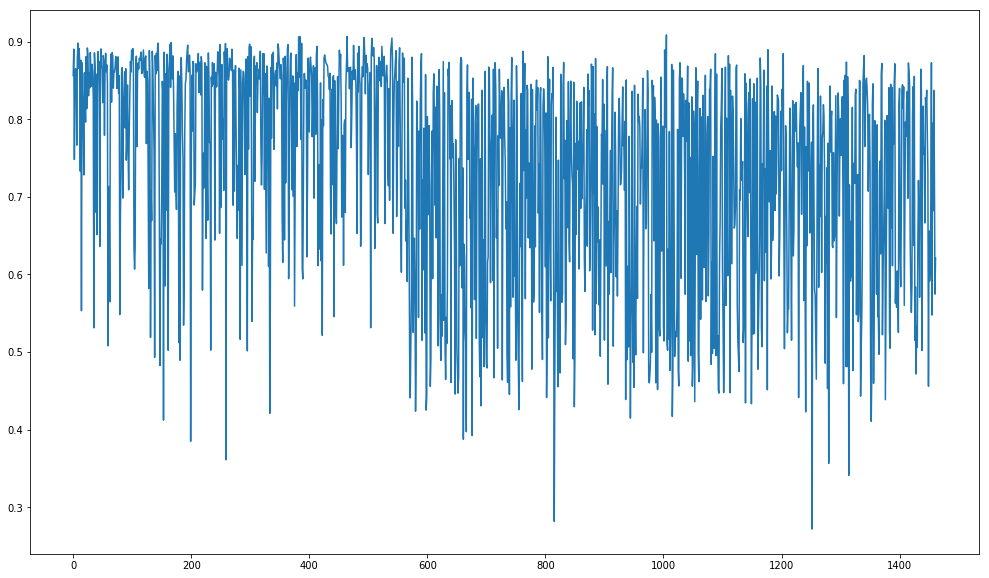

In [148]:
plt.figure(figsize=(17,10))
plt.plot(cos_m[0][1:])

In [ ]:
plt.figure(figsize=(17,10))
plt.plot(cos_m[0])

Особых различий не видно, хотя мы знаем, что они есть. Что будем делать?

Удалим стоп-слова

In [149]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stops = set(stopwords.words('russian'))

In [150]:
stops

{'а',
 'без',
 'более',
 'больше',
 'будет',
 'будто',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'быть',
 'в',
 'вам',
 'вас',
 'вдруг',
 'ведь',
 'во',
 'вот',
 'впрочем',
 'все',
 'всегда',
 'всего',
 'всех',
 'всю',
 'вы',
 'где',
 'да',
 'даже',
 'два',
 'для',
 'до',
 'другой',
 'его',
 'ее',
 'ей',
 'ему',
 'если',
 'есть',
 'еще',
 'ж',
 'же',
 'за',
 'зачем',
 'здесь',
 'и',
 'из',
 'или',
 'им',
 'иногда',
 'их',
 'к',
 'как',
 'какая',
 'какой',
 'когда',
 'конечно',
 'кто',
 'куда',
 'ли',
 'лучше',
 'между',
 'меня',
 'мне',
 'много',
 'может',
 'можно',
 'мой',
 'моя',
 'мы',
 'на',
 'над',
 'надо',
 'наконец',
 'нас',
 'не',
 'него',
 'нее',
 'ней',
 'нельзя',
 'нет',
 'ни',
 'нибудь',
 'никогда',
 'ним',
 'них',
 'ничего',
 'но',
 'ну',
 'о',
 'об',
 'один',
 'он',
 'она',
 'они',
 'опять',
 'от',
 'перед',
 'по',
 'под',
 'после',
 'потом',
 'потому',
 'почти',
 'при',
 'про',
 'раз',
 'разве',
 'с',
 'сам',
 'свою',
 'себе',
 'себя',
 'сейчас',
 'со',
 'совсем',
 'так

In [157]:
words = [y[0] for y in sorted(cv.vocabulary_.items(), key=lambda x: x[1])]

In [ ]:
cv.vocabulary_['работа']

In [158]:
c_words = zip(words, sum(matrix))

In [159]:
c_words = sorted(c_words, key=lambda x: x[1], reverse=True)
c_words[:25]

[('который', 5182),
 ('год', 3199),
 ('свой', 2826),
 ('это', 2246),
 ('фильм', 1865),
 ('самый', 1708),
 ('матч', 1697),
 ('стать', 1687),
 ('время', 1667),
 ('клуб', 1440),
 ('мочь', 1388),
 ('большой', 1350),
 ('весь', 1274),
 ('российский', 1268),
 ('человек', 1249),
 ('россия', 1209),
 ('команда', 1167),
 ('лига', 1142),
 ('чемпионат', 1081),
 ('новый', 1044),
 ('сезон', 1012),
 ('место', 1006),
 ('главный', 940),
 ('мир', 937),
 ('хороший', 918)]

In [160]:
stop_w = set([x[0] for x in c_words[:4]])
stop_w = list(stop_w | stops)

In [154]:
def token_r(text):
    words = simple_word_tokenize(text)
    return [m.parse(x)[0].normal_form for x in words if len(x)>=4]

In [161]:
cv = CountVectorizer(tokenizer=token_r, stop_words=stop_w)

In [162]:
%%time
matrix = cv.fit_transform(texts).toarray()

CPU times: user 2min 1s, sys: 439 ms, total: 2min 2s
Wall time: 2min 3s


In [ ]:
matrix.shape

In [163]:
cos_m = cosine_similarity(matrix[0].reshape(1,-1), matrix[1:])

In [ ]:
cos_m = cosine_similarity(matrix)

In [ ]:
cos_m.shape

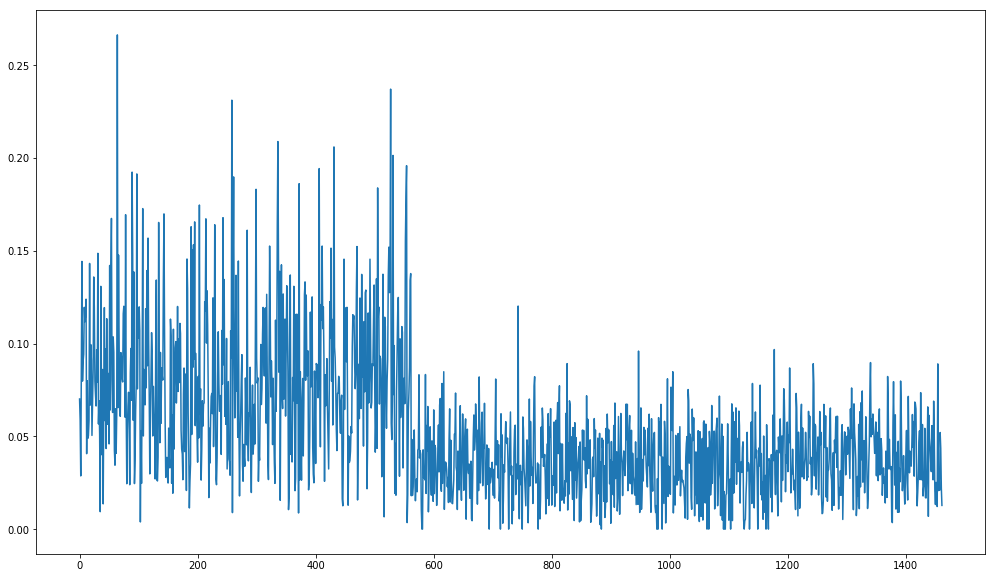

In [164]:
plt.figure(figsize=(17,10))
plt.plot(cos_m[0][1:])

Можно усреднить близость к нескольким документам

In [165]:
cos_m = cosine_similarity(matrix[0:5], matrix[5:])
cos_m.shape

(5, 1459)

In [ ]:
cos_m.sum(axis=0).shape

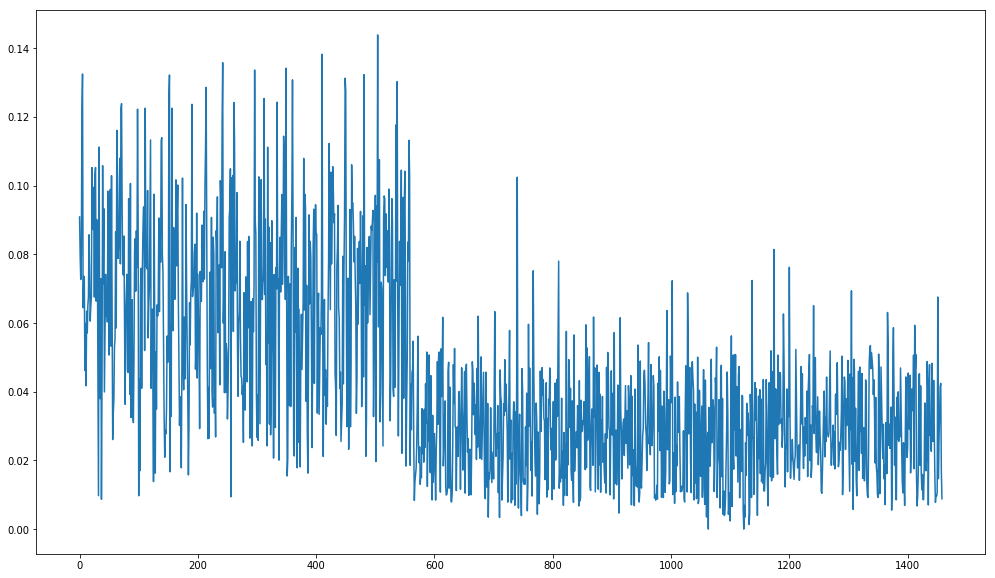

In [166]:
plt.figure(figsize=(17,10))
plt.plot(cos_m.sum(axis=0)/5)

In [ ]:
# import zipfile
# zip_ref = zipfile.ZipFile('vac_dicts.zip', 'r')
# zip_ref.extractall()
# zip_ref.close()

Добавим отрицательных примеров

In [172]:
nn = 10
cos_m_pos = cosine_similarity(matrix[:nn], matrix[nn:])
cos_m_neg = cosine_similarity(matrix[-nn:], matrix[:-nn])

In [ ]:
cos_m_neg.shape

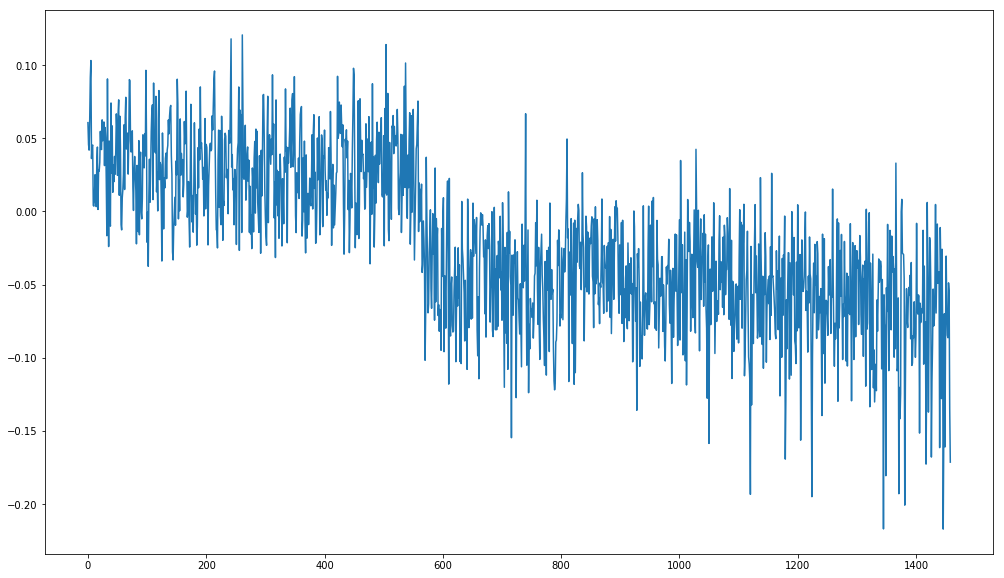

In [168]:
plt.figure(figsize=(17,10))
plt.plot(cos_m_pos.sum(axis=0)/5 - cos_m_neg.sum(axis=0)/5)

Посмотрим внимательнее на минимум

In [ ]:
cos_m[0][len(data[0]):].argmin()

In [ ]:
texts[len(data[0]) + 2]

In [ ]:
ind1 = [0,1,2,3,178]
ind2 = [2030, 3996, 3997, 3998, 3999]
inv = list(set(range(4000)) - set(ind1) - set(ind2))

In [ ]:
cos_m_pos = cosine_similarity(matrix[ind1], matrix[inv])
cos_m_neg = cosine_similarity(matrix[ind2], matrix[inv])

In [ ]:
plt.figure(figsize=(17,10))
plt.plot(cos_m_pos.sum(axis=0)/5 - cos_m_neg.sum(axis=0)/5)

# Интерпретация

In [173]:
arr = cos_m_pos.sum(axis=0)/nn - cos_m_neg.sum(axis=0)/nn

In [174]:
# Новостей культуры
arr_it = arr[:len(data[0])]
len(arr_it[arr_it > 0]), len(arr_it[arr_it > 0])/len(data[0])

(491, 0.8629173989455184)

In [175]:
arr_it = arr[len(data[0]):]
len(arr_it[arr_it < 0]), len(arr_it[arr_it < 0])/len(data[1])

(853, 0.9530726256983241)